## Preview original data

In [44]:
import sys
!{sys.executable} -m pip install uszipcode

from datetime import datetime
from uszipcode import SearchEngine

from scipy import stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
# Settings
pd.options.display.max_columns = 200
pd.options.display.max_rows = 50000
sns.set()
search = SearchEngine()

In [46]:
listings = pd.read_csv('listings.csv', low_memory=False)
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,1.0,1.0,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,NaN,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",$143.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,2.0,5.0,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",$30.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,https://www.airbnb.com/users/show/461263600,Tommaso,2022-05-27,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Tottenville,1.0,1.0,"['email', 'phone']",f,f,NaN,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,NaN,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",$157.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,https://www.airbnb.com/users/show/475699129,Suliman,2022-08-18,NaN,NaN,within an hour,99%,98%,t,http

In [47]:
listings.shape

(42931, 75)

## Drop columns with high cardinality (too unique values)

In [48]:
# Filter for string columns
txt_cols = listings.select_dtypes(['object']).copy()
txt_cols.head(5)

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/801749842377802394,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,Private room in home,Private room,1 bath,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",$143.00,t,2023-03-06,NaN,NaN,NaN,f
1,https://www.airbnb.com/rooms/765948794133787266,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,Private room in rental unit,Private room,1 shared bath,"[""Free parking on premises"", ""Carbon monoxide ...",$30.00,t,2023-03-06,2022-12-06,2023-02-19,NaN,t
2,https://www.airbnb.com/rooms/636274456676328779,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/461263600,Tommaso,2022-05-27,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Tottenville,"['email', 'phone']",f,f,NaN,Tottenville,Staten Island,Entire villa,Entire home/apt,2 baths,"[""BBQ grill"", ""Security cameras on property"", ...",$157.00,t,2023-03-06,NaN,NaN,NaN,f
3,https://www.airbnb.com/rooms/768125251187660469,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/475699129,Suliman,2022-08-18,NaN,NaN,within an hour,99%,98%,t,https://a0.muscache.com/im/pictures/user/df58a...,https://a0.muscache.com/im/pictures/user/df58a...,Brighton Beach,"['email', 'phone']",t,t,NaN,Sheepshead Bay,Brooklyn,Private room in home,Private room,2 baths,"[""Security cameras on property"", ""Keypad"", ""Ca...",$89.00,t,2023-03-06,2022-12-10,2023-02-07,NaN,t
4,https://www.airbnb.com/rooms/49248255,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,https://www.airbnb.com/users/show/397288055,Katherine,2021-04-16,NaN,NaN,within an hour,75%,68%,f,https://a0.muscache.com/im/pictures/user/e70f8...,https://a0.muscache.com/im/pictures/user/e70f8...,North Riverdale,['phone'],t,t,"The Bronx, New York, United States",North Riverdale,Bronx,Entire rental unit,Entire home/apt,1 bath,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",$125.00,t,2023-03-06,2021-04-30,2022-11-13,NaN,f


In [49]:
# Remove numeric columns from `txt_cols`
to_drop = ['host_response_rate', 'host_acceptance_rate', 'price']
txt_cols.drop(to_drop, axis=1, inplace=True)
txt_cols.head(2)

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/801749842377802394,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/495455523,Michael,2023-01-10,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/773ed...,https://a0.muscache.com/im/pictures/user/773ed...,Canarsie,"['email', 'phone']",t,f,NaN,Canarsie,Brooklyn,Private room in home,Private room,1 bath,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",t,2023-03-06,NaN,NaN,NaN,f
1,https://www.airbnb.com/rooms/765948794133787266,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488760226,Eric,2022-11-22,NaN,NaN,within an hour,f,https://a0.muscache.com/im/pictures/user/87e00...,https://a0.muscache.com/im/pictures/user/87e00...,Canarsie,"['email', 'phone']",t,t,NaN,Canarsie,Brooklyn,Private room in rental unit,Private room,1 shared bath,"[""Free parking on premises"", ""Carbon monoxide ...",t,2023-03-06,2022-12-06,2023-02-19,NaN,t


In [50]:
# Filter for columns with more than 50 unique values or only 1 unique value (constant variables provide no information)
cardinality = txt_cols.nunique()
to_drop_2 = txt_cols.columns[(cardinality == 1) | (cardinality > 50)].tolist()
to_drop_2

['listing_url',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'amenities',
 'first_review',
 'last_review',
 'license']

In [51]:
# Remove `neighbourhood_cleansed` and `zipcode` from to_drop_2
to_remove = ['host_neighbourhood', 'neighbourhood_cleansed', 'first_review', 'last_review']
for col in to_remove:
    to_drop_2.remove(col)

# Drop these columns from the main data
listings.drop(to_drop_2, axis=1, inplace=True)
listings.head(2)

,id,scrape_id,last_scraped,source,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,20230306014634,2023-03-06,city scrape,495455523,NaN,NaN,NaN,f,Canarsie,1.0,1.0,"['email', 'phone']",t,f,Canarsie,Brooklyn,40.640403,-73.888535,Private room,2,NaN,1 bath,1.0,1.0,$143.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,364,2023-03-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,20230306014634,2023-03-06,city scrape,488760226,within an hour,100%,100%,f,Canarsie,2.0,5.0,"['email', 'phone']",t,t,Canarsie,Brooklyn,40.648510,-73.894330,Private room,1,NaN,1 shared bath,1.0,1.0,$30.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,15,19,38,41,2023-03-06,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,t,2,1,1,0,4.29


In [52]:
to_drop_3 = ['scrape_id', 'last_scraped', 'host_id', 
            'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
             'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 
             'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
             'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
             'maximum_nights_avg_ntm', 'calendar_last_scraped',
             'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
             'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
listings.drop(to_drop_3, axis=1, inplace=True)
listings.head(2)

,id,source,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,801749842377802394,city scrape,f,Canarsie,40.640403,-73.888535,Private room,2,NaN,1 bath,1.0,1.0,$143.00,2,NaN,t,30,60,90,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,765948794133787266,city scrape,f,Canarsie,40.648510,-73.894330,Private room,1,NaN,1 shared bath,1.0,1.0,$30.00,2,NaN,t,15,19,38,41,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,t,4.29


In [53]:
# Drop columns with more than half of the values missing
to_drop_4 = listings.columns[listings.isnull().mean() > 0.5].tolist()
listings.drop(to_drop_4, axis=1, inplace=True)
listings.shape

(42931, 32)

Dropped 75-32 = 43 columns

## Recast columns

In [54]:
# Convert boolean columns to numeric type
bool_cols = ['host_is_superhost', 'instant_bookable']
bool_map = {'f': 0, 't': 1}
for col in bool_cols:
    listings[col] = listings[col].map(bool_map)
listings.head(2)

,id,source,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,801749842377802394,city scrape,0.0,Canarsie,40.640403,-73.888535,Private room,2,1 bath,1.0,1.0,$143.00,2,t,30,60,90,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,765948794133787266,city scrape,0.0,Canarsie,40.648510,-73.894330,Private room,1,1 shared bath,1.0,1.0,$30.00,2,t,15,19,38,41,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,1,4.29


In [56]:
# Convert string columns with numeric values to numeric type
str_cols = ['price']
for col in str_cols:
    listings[col] = listings[col].str.strip('$').str.replace(',', '').astype(float)
listings.head(2)

,id,source,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,801749842377802394,city scrape,0.0,Canarsie,40.640403,-73.888535,Private room,2,1 bath,1.0,1.0,143.0,2,t,30,60,90,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,765948794133787266,city scrape,0.0,Canarsie,40.648510,-73.894330,Private room,1,1 shared bath,1.0,1.0,30.0,2,t,15,19,38,41,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,1,4.29


In [57]:
# Convert date columns to datetime type
date_cols = ['first_review', 'last_review']
for col in date_cols:
    listings[col] = pd.to_datetime(listings[col])
listings.head(2)

,id,source,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,801749842377802394,city scrape,0.0,Canarsie,40.640403,-73.888535,Private room,2,1 bath,1.0,1.0,143.0,2,t,30,60,90,364,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,765948794133787266,city scrape,0.0,Canarsie,40.648510,-73.894330,Private room,1,1 shared bath,1.0,1.0,30.0,2,t,15,19,38,41,13,13,5,2022-12-06,2023-02-19,4.85,4.77,4.77,4.85,4.92,4.85,4.92,1,4.29


In [59]:
listings.columns

Index(['id', 'source', 'host_is_superhost', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

## Missing data

In [58]:
missing = pd.DataFrame(listings.isnull().sum(), columns=['num_missing'])
missing['pct_missing'] = np.round(listings.isnull().mean(), 2)
missing[missing.num_missing > 0]

,num_missing,pct_missing
host_is_superhost,25,0.00
bathrooms_text,75,0.00
bedrooms,3874,0.09
beds,929,0.02
first_review,10304,0.24
last_review,10304,0.24
review_scores_rating,10304,0.24
review_scores_accuracy,10739,0.25
review_scores_cleanliness,10729,0.25
review_scores_checkin,10743,0.25


- drop host_is_superhost since only missing 25 data
- first_review, last_review, reviews_per_month - the data here is missing because these listings have 0 number_of_reviews so there is no data, reviews_per_month will be filled with 0 and the other 2 will be filled with the last date of the dataset (arbitrary choice)
- review_scores_rating, review_scores_accuracy, review_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value - since these variables are ordinal in nature, filling as much as ~20% of the data with arbitary values like 0 or -1 may be misleading later on, these will be left as null for now


In [63]:
# Drop rows missing `host_is_superhost`
listings.dropna(subset=['host_is_superhost'], inplace=True)
listings.shape

(42906, 32)

In [69]:
listings['reviews_per_month'].fillna(0, inplace=True)
listings[['reviews_per_month']].isnull().mean()

reviews_per_month    0.0
dtype: float64

In [71]:
# Fill `first_review` and `last_review` with May 8, 2020
for col in ['first_review', 'last_review']:
    listings[col].fillna(datetime(2023, 3, 6), inplace=True)
listings[['first_review', 'last_review']].isnull().mean()

first_review    0.0
last_review     0.0
dtype: float64

## Missing room-values

In [74]:
listings.isnull().sum()[listings.isnull().sum() > 0][:3]

bathrooms_text      50
bedrooms          3849
beds               904
dtype: int64

In [78]:
type(listings['bedrooms'])

pandas.core.series.Series

In [83]:
from scipy import stats

room_vars = ['bathrooms_text', 'bedrooms', 'beds']
lines = []

for c in room_vars:
    print(f'x=accommodates | y={c}')
    # Filter out rows with missing values for both 'accommodates' and 'c'
    valid_rows = listings.dropna(subset=['accommodates', c])
    
    # Convert the columns to numeric data type
    x = pd.to_numeric(valid_rows['accommodates'], errors='coerce')
    y = pd.to_numeric(valid_rows[c], errors='coerce')
    
    try:
        line = stats.linregress(x, y)
        lines.append(line)
        print(line, '\n')
    except ValueError as e:
        print(f'Error occurred: {e}')

# Continue with the rest of your code using the 'lines' list if necessary


x=accommodates | y=bathrooms_text
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan) 

x=accommodates | y=bedrooms
LinregressResult(slope=0.2532374351134452, intercept=0.6361913754050053, rvalue=0.683845836682841, pvalue=0.0, stderr=0.0013671998252809256, intercept_stderr=0.005050528048431098) 

x=accommodates | y=beds
LinregressResult(slope=0.42796232821402735, intercept=0.37617456737933286, rvalue=0.7744828619033739, pvalue=0.0, stderr=0.0017056690329983624, intercept_stderr=0.006251685220948726) 



In [84]:
for i in range(3):
    v = room_vars[i]
    m, b = lines[i].slope, lines[i].intercept
    listings[v].fillna(np.round(listings['accommodates'] * m + b), inplace=True)
    
listings.isnull().sum()[listings.isnull().sum() > 0]

bathrooms_text                    50
review_scores_rating           10297
review_scores_accuracy         10732
review_scores_cleanliness      10722
review_scores_checkin          10736
review_scores_communication    10727
review_scores_location         10739
review_scores_value            10739
dtype: int64

## Outliers

In [85]:
listings.describe()

,id,host_is_superhost,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
count,4.290600e+04,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,42906.000000,32609.000000,32174.000000,32184.000000,32170.000000,32179.000000,32167.000000,32167.000000,42906.000000,42906.000000
mean,2.224068e+17,0.219526,40.728261,-73.943643,2.974549,1.380879,1.648581,200.423880,18.115741,9.766303,21.139235,33.700928,140.343938,25.828625,7.731949,0.432037,4.636577,4.749846,4.635809,4.813944,4.812836,4.732688,4.641977,0.210297,0.887825
std,3.344757e+17,0.413931,0.057652,0.056634,2.122834,0.776740,1.167254,895.330585,27.467921,11.865699,23.678486,35.694900,142.002470,56.525639,18.285690,1.692394,0.718690,0.468781,0.539261,0.417820,0.435603,0.415747,0.498855,0.407524,1.636930
min,2.595000e+03,0.000000,40.500314,-74.251907,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.938864e+07,0.000000,40.687470,-73.981728,2.000000,1.000000,1.000000,75.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.600000,4.700000,4.500000,4.800000,4.800000,4.640000,4.540000,0.000000,0.010000
50%,4.337518e+07,0.000000,40.724015,-73.952595,2.000000,1.000000,1.000000,125.000000,7.000000,3.000000,9.000000,20.000000,89.000000,5.000000,0.000000,0.000000,4.830000,4.890000,4.800000,4.950000,4.960000,4.850000,4.770000,0.000000,0.240000
75%,6.306682e+17,0.000000,40.762290,-73.924013,4.000000,2.000000,2.000000,200.000000,30.000000,22.000000,45.000000,70.000000,289.000000,24.000000,7.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,0.000000,1.170000
max,8.404660e+17,1.000000,40.911380,-73.710870,16.000000,16.000000,42.000000,99000.000000,1250.000000,30.000000,60.000000,90.000000,365.000000,1842.000000,1093.000000,142.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,86.610000


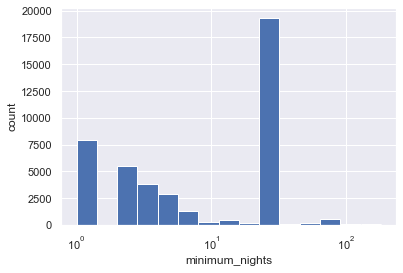

In [86]:
listings.minimum_nights.hist(bins=2**np.arange(0, 8, 0.5))
plt.xscale('log')
plt.xlabel('minimum_nights')
plt.ylabel('count');

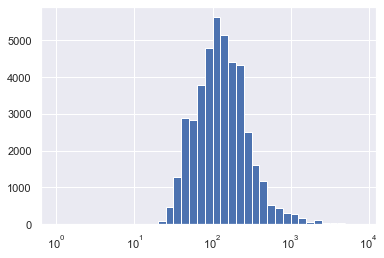

In [87]:
listings.price.hist(bins=10**np.arange(0, 4, 0.1))
plt.xscale('log');

In [88]:
# Define outlier threshold
iqr = listings.price.quantile(0.75) - listings.price.quantile(0.25)
thresh = int(5 * iqr + listings.price.quantile(0.75))

# Count outliers
num_gt1k = listings[listings.price > thresh].shape[0]
pct_gt1k = round(100 * num_gt1k / listings.shape[0], 2)
print(f'{num_gt1k} listings cost more than ${thresh} a night, which is {pct_gt1k}% of all listings in NY')

913 listings cost more than $825 a night, which is 2.13% of all listings in NY


Maximum value for minimum nights is around 1000

In [89]:
# Bin `minimum_nights`
listings['minimum_nights'] = listings['minimum_nights'].apply(lambda n: n if n == 1 else (30 if n >= 30 else 15))
listings.minimum_nights.value_counts().sort_index()

1      7929
15    14860
30    20117
Name: minimum_nights, dtype: int64

In [90]:
listings = listings[listings.price > 0]

In [91]:
listings.shape

(42904, 32)

## Saving files

In [94]:
listings.to_pickle('listings_clean.pkl')
pd.read_pickle('listings_clean.pkl').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42904 entries, 0 to 42930
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           42904 non-null  int64         
 1   source                       42904 non-null  object        
 2   host_is_superhost            42904 non-null  float64       
 3   neighbourhood_cleansed       42904 non-null  object        
 4   latitude                     42904 non-null  float64       
 5   longitude                    42904 non-null  float64       
 6   room_type                    42904 non-null  object        
 7   accommodates                 42904 non-null  int64         
 8   bathrooms_text               42856 non-null  object        
 9   bedrooms                     42904 non-null  float64       
 10  beds                         42904 non-null  float64       
 11  price                        42904 non-nu

In [95]:
listings.to_csv('listings_clean.csv')
pd.read_csv('listings_clean.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42904 entries, 0 to 42903
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   42904 non-null  int64  
 1   id                           42904 non-null  int64  
 2   source                       42904 non-null  object 
 3   host_is_superhost            42904 non-null  float64
 4   neighbourhood_cleansed       42904 non-null  object 
 5   latitude                     42904 non-null  float64
 6   longitude                    42904 non-null  float64
 7   room_type                    42904 non-null  object 
 8   accommodates                 42904 non-null  int64  
 9   bathrooms_text               42856 non-null  object 
 10  bedrooms                     42904 non-null  float64
 11  beds                         42904 non-null  float64
 12  price                        42904 non-null  float64
 13  minimum_nights  